In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-jobs-on-monstercom/monster_com-job_sample.csv


# CLUSTERING

In [29]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values
df_new['sector'].fillna('Unknown', inplace=True)
df_new['job_type'].fillna('Unknown', inplace=True)

# Encode categorical variables
le_sector = LabelEncoder()
le_type = LabelEncoder()

df_new['sector_encoded'] = le_sector.fit_transform(df_new['sector'])
df_new['job_type_encoded'] = le_type.fit_transform(df_new['job_type'])


In [30]:
features = df_new[['sector_encoded', 'job_type_encoded']].copy()

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_new['cluster'] = kmeans.fit_predict(features)

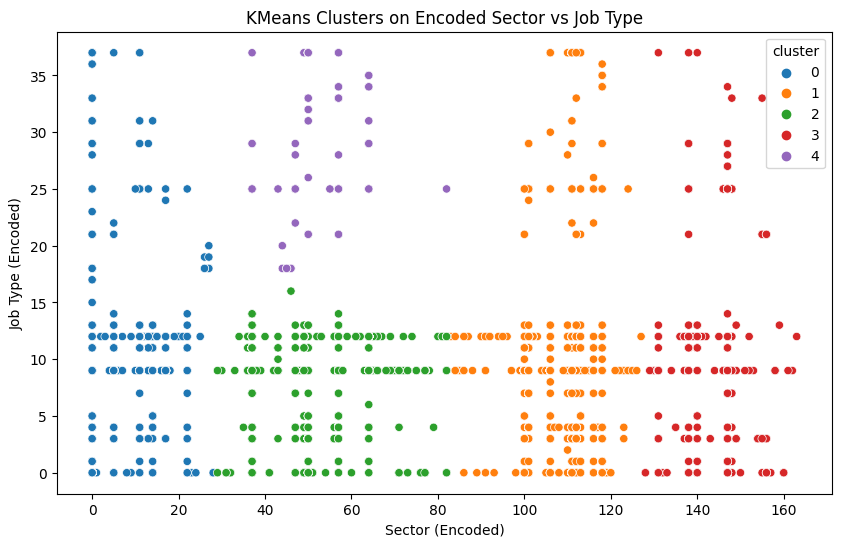

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='sector_encoded', y='job_type_encoded', hue='cluster', palette='tab10')
plt.title('KMeans Clusters on Encoded Sector vs Job Type')
plt.xlabel('Sector (Encoded)')
plt.ylabel('Job Type (Encoded)')
plt.show()


This plot visually demonstrates that certain job types cluster together within specific sectors, and that there are distinct groupings in the job data that can be used for:

- Personalized job recommendations

- Automated job category classification

- User segmentation (e.g., matching users to job personas)

#### 🔍 Interpretation:
#### 1. Cluster 0 (blue):

- Mostly found in sectors with low encoded values (left side of X-axis).

- Job types are spread but often in mid to lower values (Y-axis).

- Might represent common full-time jobs in foundational sectors (e.g., IT, customer service).


#### 2. Cluster 1 (orange):

- Found in middle-to-right sectors, wide variety of job types.

- Could reflect diverse job types in mid-popularity industries (e.g., education, sales).

  

#### 3. Cluster 2 (green):

- Dominates a mid-range of sectors and job types.

- Potentially a mix of general jobs from mid-range industries with uniform job types.

  

#### 4. Cluster 3 (red):

- Sectors on the far right, concentrated in fewer job types.

- Possibly specialized or high-level industries (e.g., consulting, finance) with fewer job types.

  

#### 5. Cluster 4 (purple):

- Concentrated higher on the Y-axis (less common job types), in middle sectors.

- Might indicate rare or niche job types in moderately popular sectors.